In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,roc_curve

In [5]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)

In [7]:
y_train.value_counts(normalize=True)

0    0.651466
1    0.348534
Name: Outcome, dtype: float64

In [8]:
y_test.value_counts(normalize=True)

0    0.649351
1    0.350649
Name: Outcome, dtype: float64

In [9]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [10]:
cols_plot=X.columns

AttributeError: 'DataFrame' object has no attribute 'price'

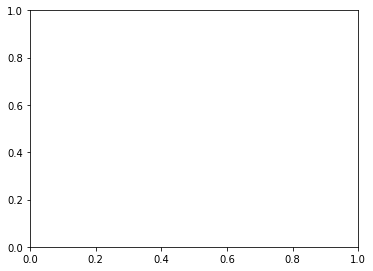

In [11]:
for data in [X_train,X_test]:
    plt.figure(figsize=(20,20))
    for i, feature in enumerate(cols_plot):
        plt.subplot(4, 3, i+1)
        col_values = data[feature]
        unique = sorted(set(col_values.dropna().values))
        if len(unique) < 10:
            # categorical: let's make a violin plot
            plt.violinplot([data.price.values[col_values == level] for level in unique],
                           positions=range(len(unique)))
            plt.xticks(range(len(unique)), labels=unique)
        else:
            plt.scatter(col_values.values,data.price.values, alpha=0.01, edgecolor=None)
        plt.xlabel(feature)
        plt.ylabel('Price')

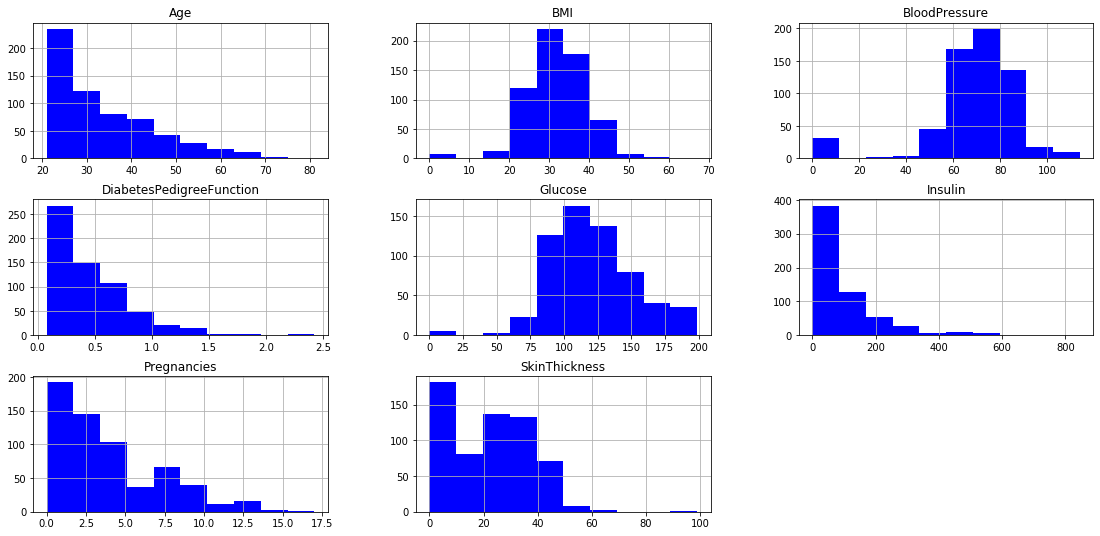

In [12]:
X_train.hist(figsize=(19,9),color='blue')
plt.show();

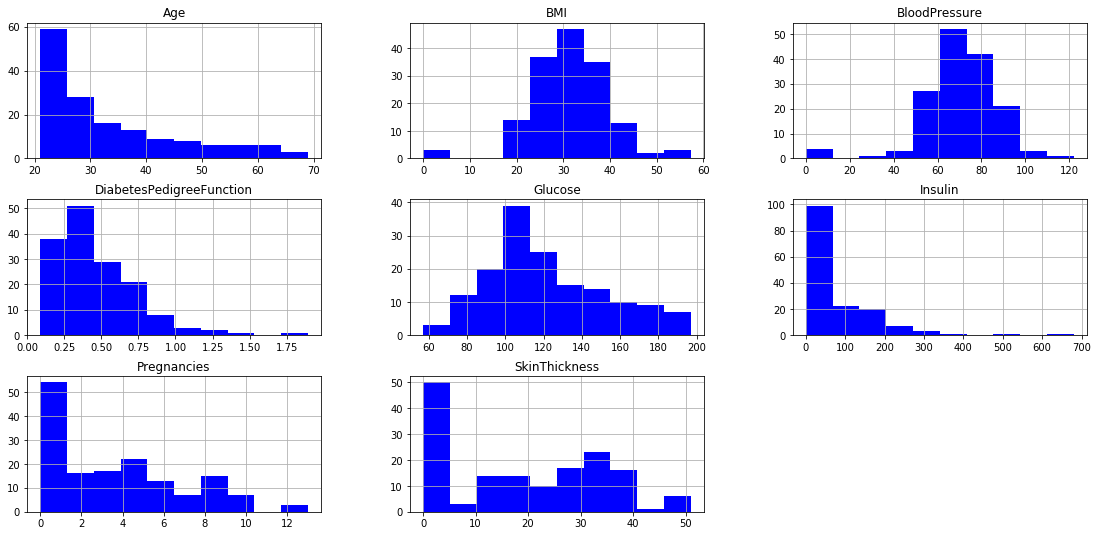

In [13]:
X_test.hist(figsize=(19,9),color='blue')
plt.show();

In [41]:
reg1 = setup(data = df,target = 'Outcome', session_id=123)

Setup Succesfully Completed!


In [42]:
cb=create_model('catboost')

In [43]:
tuned_cb=tune_model(cb,optimize='F1',n_iter=10,fold=5)

In [44]:
xgb=create_model('xgboost')

In [45]:
tuned_xgb=tune_model(xgb,optimize='F1',n_iter=10,fold=5)

In [46]:
rf=create_model('rf')

In [47]:
tuned_rf=tune_model(rf,optimize='F1',n_iter=10,fold=5)

In [48]:
lr=create_model('lr')

In [49]:
tuned_lr=tune_model(lr,optimize='F1',n_iter=10,fold=5)

In [50]:
tuned_cb.feature_importances_

array([22.77879525, 11.33835975,  5.46989972,  7.23576025, 16.833665  ,
       10.10112845, 13.08169366,  0.91061439,  1.68445762,  1.60865523,
        0.46579352,  0.63167282,  0.16795525,  0.        ,  0.09222994,
        0.        ,  1.0540369 ,  0.68127679,  1.29361951,  0.65259406,
        1.51503777,  0.58547079,  1.20472882,  0.61255452])

In [ ]:
#blend_all = blend_models(method='hard')

#y_pred_blend = predict_model(blend_all, data=test_model)

In [53]:
blend= blend_models(estimator_list = [tuned_rf,tuned_lr])

In [63]:
predict_model(tuned_cb)

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa   MCC
0  CatBoost Classifier    0.7489  0.8351  0.5556  0.6716  0.6081  0.4258  0.43

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      114.0           88.0            0.0      0.0  27.8   
1       97.0           70.0           15.0      0.0  18.2   
2       90.0           70.0           17.0      0.0  27.3   
3      105.0           58.0           40.0     94.0  34.9   
4      138.0           76.0            0.0      0.0  33.2   
..       ...            ...            ...      ...   ...   
226    110.0           74.0           29.0    125.0  32.4   
227    115.0            0.0            0.0      0.0  35.3   
228    100.0           78.0           25.0    184.0  36.6   
229     95.0           74.0           21.0     73.0  25.9   
230    119.0           66.0           27.0      0.0  38.8   

     DiabetesPedigreeFunction   Age  Pregnancies_0  Pregnancies_1  \
0                       0.247  66.0            0.0            0.0   
1                       0.147  21.0            0.0            1.0   
2                       0.085  22.0            0.0            0.0   
3                       0.225  25.0            0.0            0.0   
4                       0.420  35.0            0.0            0.0   
..                        ...   ...            ...            ...   
226                     0.698  27.0            0.0            0.0   
227                     0.134  29.0            0.0            0.0   
228                     0.412  46.0            0.0            0.0   
229                     0.673  36.0            0.0            1.0   
230                     0.259  22.0            1.0            0.0   

     Pregnancies_10  ...  Pregnancies_3  Pregnancies_4  Pregnancies_5  \
0               0.0  ...            0.0            0.0            0.0   
1               0.0  ...            0.0            0.0            0.0   
2               0.0  ...            0.0            0.0            0.0   
3               0.0  ...            0.0            0.0            0.0   
4               0.0  ...            0.0            0.0            0.0   
..              ...  ...            ...            ...            ...   
226             0.0  ...            0.0            0.0            0.0   
227             1.0  ...            0.0            0.0            0.0   
228             0.0  ...            0.0            0.0            0.0   
229             0.0  ...            0.0            0.0            0.0   
230             0.0  ...            0.0            0.0            0.0   

     Pregnancies_6  Pregnancies_7  Pregnancies_8  Pregnancies_9  Outcome  \
0              1.0            0.0            0.0            0.0        0   
1              0.0            0.0            0.0            0.0        0   
2              0.0            0.0            0.0            0.0        0   
3              0.0            0.0            0.0            0.0        0   
4              0.0            0.0            0.0            0.0        0   
..             ...            ...            ...            ...      ...   
226            0.0            0.0            0.0            0.0        0   
227            0.0            0.0            0.0            0.0        0   
228            0.0            0.0            0.0            0.0        1   
229            0.0            0.0            0.0            0.0        0   
230            0.0            0.0            0.0            0.0        0   

     Label   Score  
0        0  0.0330  
1        0  0.0010  
2        0  0.0072  
3        0  0.1208  
4        1  0.6639  
..     ...     ...  
226      0  0.3601  
227      1  0.7297  
228      0  0.2295  
229      0  0.0100  
230      0  0.4173  

[231 rows x 27 columns]

In [ ]:
df.loc[X_train.index]

In [ ]:
train.head()

In [ ]:
train.info()

In [ ]:
train.describe()

In [ ]:
cols_plot=train.columns[2:-1]
cols_plot

In [ ]:
train_arg=train[train.pais=='Argentina']
train_col=train[train.pais=='Colombia']

In [ ]:
for data in [train_arg,train_col]:
    plt.figure(figsize=(20,20))
    for i, feature in enumerate(cols_plot):
        plt.subplot(4, 3, i+1)
        col_values = data[feature]
        unique = sorted(set(col_values.dropna().values))
        if len(unique) < 10:
            # categorical: let's make a violin plot
            plt.violinplot([data.price.values[col_values == level] for level in unique],
                           positions=range(len(unique)))
            plt.xticks(range(len(unique)), labels=unique)
        else:
            plt.scatter(col_values.values,data.price.values, alpha=0.01, edgecolor=None)
        plt.xlabel(feature)
        plt.ylabel('Price')

In [ ]:
train_arg.hist(figsize=(10,10),color='blue');

In [ ]:
train_col.hist(figsize=(10,10),color='yellow');

In [ ]:
def en_rango(serie):
    Q1,Q3=serie.quantile([0.25,0.75])
    IQR=Q3-Q1
    techo=Q3+2.5*IQR
    piso=max(0,Q1-2.5*IQR)
    return (serie<techo) & (serie>piso)

In [ ]:
new_train_arg=train_arg[en_rango(train_arg.surface_total)]
new_train_col=train_col[en_rango(train_col.surface_total)]

In [ ]:
new_train_arg=new_train_arg[en_rango(new_train_arg.price)]
new_train_col=new_train_col[en_rango(new_train_col.price)]

In [ ]:
new_train_arg.hist(figsize=(19,9),color='blue')
plt.show();

In [ ]:
new_train_col.hist(figsize=(19,9),color='orange')
plt.show();

In [ ]:
from scipy import stats

cols_mod=['surface_total','price']

nuevos_nombres=[x+'_bct' for x in cols_mod]

In [ ]:
new_cols_arg=[]
fitted_lambdas_arg=[]
for col in cols_mod:
    y, fitted_lambda = stats.boxcox(new_train_arg[col])
    new_cols_arg.append(y)
    fitted_lambdas_arg.append(fitted_lambda)

In [ ]:
fitted_lambdas_arg

In [ ]:
new_cols_col=[]
fitted_lambdas_col=[]
for col in cols_mod:
    y, fitted_lambda = stats.boxcox(new_train_col[col])
    new_cols_col.append(y)
    fitted_lambdas_col.append(fitted_lambda)

In [ ]:
fitted_lambdas_col

In [ ]:
from scipy.special import boxcox, inv_boxcox

In [ ]:
new_train_arg['surface_total']=boxcox(new_train_arg['surface_total'],fitted_lambdas_arg[0])
new_train_col['surface_total']=boxcox(new_train_col['surface_total'],fitted_lambdas_col[0])

In [ ]:
new_train_arg['price']=boxcox(new_train_arg['price'],fitted_lambdas_arg[1])
new_train_col['price']=boxcox(new_train_col['price'],fitted_lambdas_col[1])

In [ ]:
new_train_arg=new_train_arg.drop(columns=['Id','operation_type','currency','property_type','pais'])
new_train_col=new_train_col.drop(columns=['Id','operation_type','currency','property_type','pais'])

In [ ]:
new_train_arg

In [ ]:
X_train_arg=new_train_arg.iloc[:,:-1]
y_train_arg=new_train_arg.iloc[:,-1]
X_train_col=new_train_col.iloc[:,:-1]
y_train_col=new_train_col.iloc[:,-1]

In [ ]:
new_train_arg

In [ ]:
reg1 = setup(data = new_train_arg,target = 'price', session_id=123)

In [ ]:
y_pred_arg=predict_model(blend_arg,X_train_arg).Label

In [ ]:
y_pred_arg_tr

In [ ]:
y_train_arg_tr

In [ ]:
y_pred_arg_tr,y_train_arg_tr=inv_boxcox([y_pred_arg,y_train_arg],fitted_lambdas_arg[1])

In [ ]:
(y_train_arg_tr-y_pred_arg_tr)

In [ ]:
df_sub.to_csv('submission.csv',index=False)

In [ ]:
df_sub.price.hist()